# ZEMAX model of FDT

## In this notebook I am analysing the ZEMAX rectangular grid model as imaged by the FDT 

In [3]:
import numpy as np
import pyfits
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit
import matplotlib.ticker as mtick
from skimage import measure
import skimage
import pandas as pd
from scipy import optimize


In [4]:
def parabola_lines(x,a,b,c):
    y = a*x**2 + b*x + c
    return y
def parabola_columns(y,m,n,p):
    x = m*y**2 + n*y + p
    return x


In [5]:
x = np.arange(0,20)



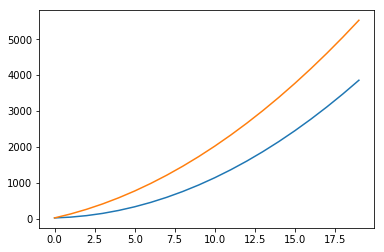

In [4]:
plt.plot(x,parabola_columns(x,10,12,20))
plt.plot(x,parabola_columns(x,10,100,20))

In [59]:
path = '/home/fatima/Desktop/solar_orbiter_project/ZEMAX/FDT/'

In [7]:
'''
F =open(path+'copy_29.txt','r')
F2 = open(path+'Model_29','w')
for line in F:
    line = line.split('%')[0]
    F2.write(line+'\n')
F2.close()
'''

In [60]:
f = np.loadtxt(path+'Model_29')
i = f[:,0]; j = f[:,1]; xfield = f[:,2]; yfield = f[:,3]; R = f[:,4]; xinput = f[:,5]; yinput=f[:,6]; xoutput = f[:,7]; youtput = f[:,8]; distortion = f[:,9]

In [61]:
print i.shape #101 pixels in x and 101 pixels in y : 101x101, center is at (50.5,50.5)
print xinput[5100]
print xoutput[5100]

(10201,)
0.0
0.0


In [63]:
print np.abs(distortion).max()
print distortion.max()
print np.where(distortion==-2.654963)
xinput[10100]


2.654963
0.042667
(array([10100]),)


0.149561

In [66]:
Routput = np.sqrt((xoutput)**2+(youtput)**2)
Rinput = np.sqrt((xinput)**2+(yinput)**2)
print (Routput[10100]-Rinput[10100])
Routput = np.delete(Routput,[5100])
Rinput = np.delete(Rinput,[5100])
d=(((Routput-Rinput)/Rinput)*100)
print d.mean()
print distortion.mean()
print np.abs(distortion).max()
print np.abs(d).max()

-0.283750983031
-0.729904874239
-0.741343716792
2.654963
2.65251158802


In [71]:
28*100./2000

1.4

In [17]:
np.abs(d).mean()
np.abs(distortion).mean()

0.743019976178806

In [56]:
100*np.sqrt((1./len(xinput))*np.sum((xinput-xoutput)**2+(yinput-youtput)**2))

7.1820532029905602

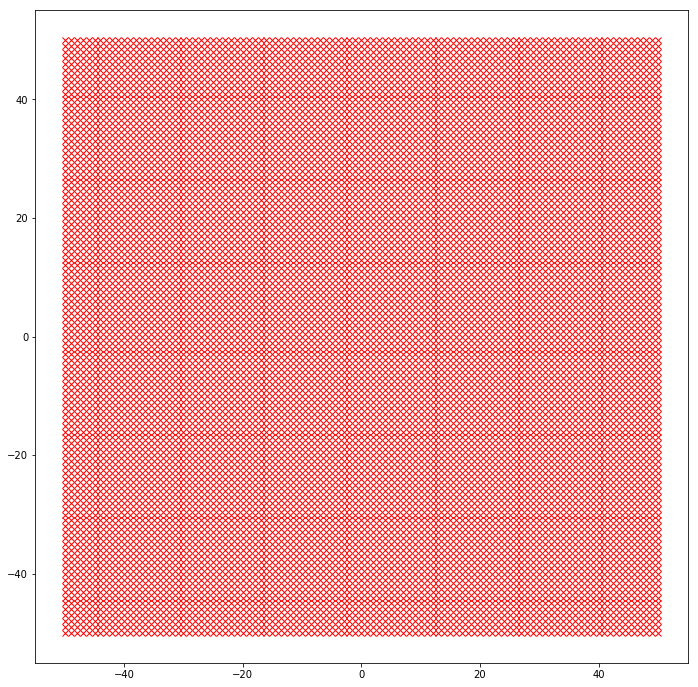

In [19]:
fig = plt.figure(figsize=(15,12))
ax= fig.add_subplot(111,aspect='equal')

ax.plot(i,j,'rx')

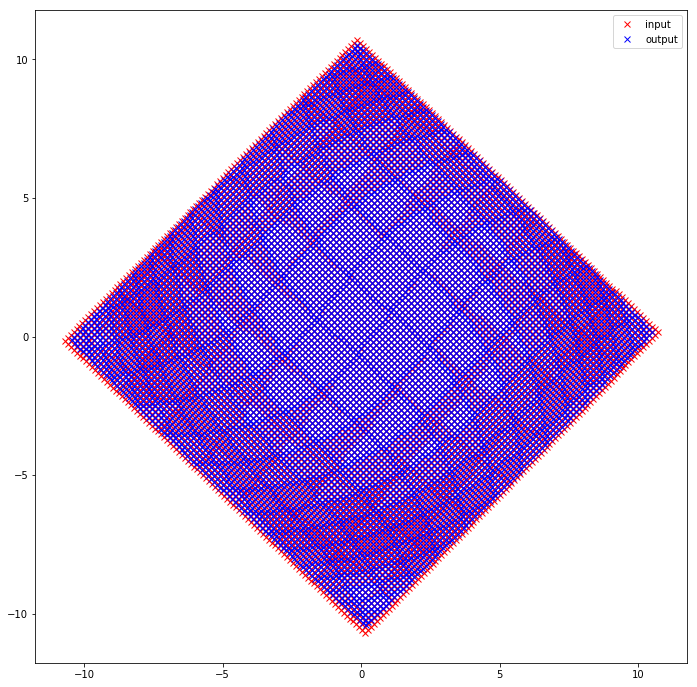

In [20]:
fig = plt.figure(figsize=(18,12))
ax= fig.add_subplot(111,aspect='equal')
ax.plot(xinput,yinput,'rx',label='input')
ax.plot(xoutput,youtput,'bx',label='output')
#plt.xlim(9,-9)
#plt.ylim(9,-9)
plt.legend()
#ax.set_aspect('auto')


In [21]:
import math
def rotate_via_numpy(xy, radians):
    """Use numpy to build a rotation matrix and take the dot product."""
    x, y = xy
    c, s = np.cos(radians), np.sin(radians)
    j = np.matrix([[c, -s], [s, c]])
    m = np.dot(j, [x, y])

    return float(m.T[0]), float(m.T[1])

def rotate_origin_only(xy, radians):
    """Only rotate a point around the origin (0, 0)."""
    x, y = xy
    xx = x * math.cos(radians) - y * math.sin(radians)
    yy = x * math.sin(radians) + y * math.cos(radians)

    return xx, yy

In [22]:
def main():
    theta = math.radians(90)
    point = (5, -11)
    
    print(rotate_via_numpy(point, theta))
    print(rotate_origin_only(point, theta))
    
main()   

(11.0, 4.999999999999999)
(11.0, 4.999999999999999)


In [23]:
x_r = 0; y_r =0
theta = math.radians(-45)
x_p_in =  (xinput-x_r)* np.cos(theta) - (yinput-y_r) * np.sin(theta)
y_p_in = (xinput - x_r)* np.sin(theta) + (yinput- y_r) * np.cos(theta)


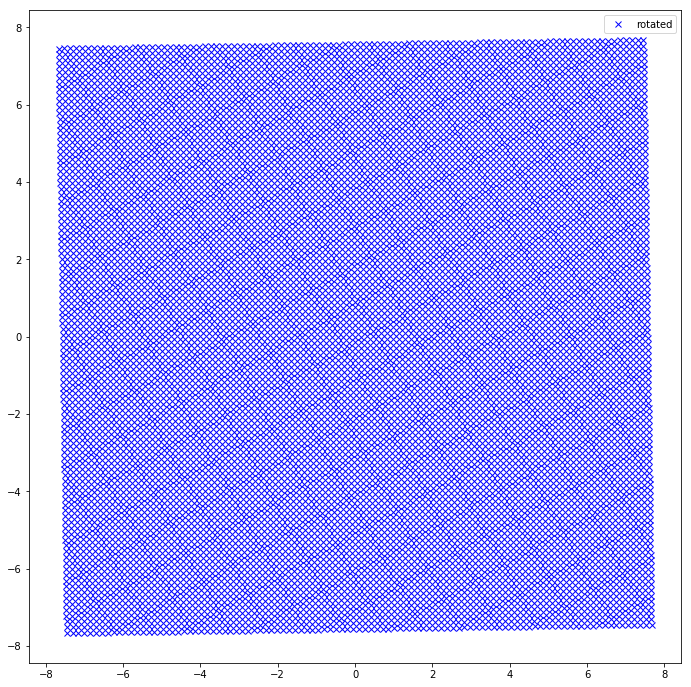

In [24]:

fig = plt.figure(figsize=(18,12))
ax=fig.add_subplot(111,aspect='equal')
ax.plot(x_p_in,y_p_in,'bx',label='rotated')

plt.legend()


In [25]:
x_p =  (xoutput-x_r)* np.cos(theta) - (youtput -y_r)* np.sin(theta)
y_p = (xoutput -x_r)* np.sin(theta) + (youtput -y_r)* np.cos(theta)

In [33]:
20./np.sqrt(2)

14.142135623730949

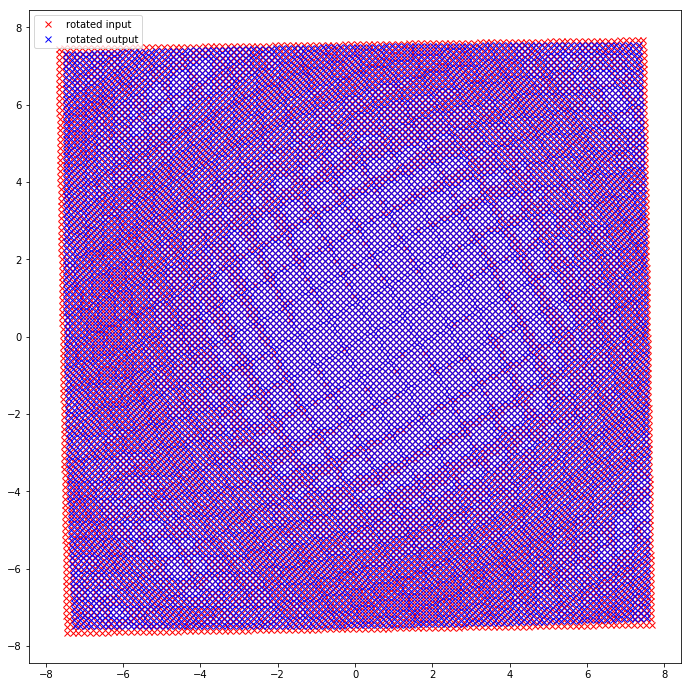

In [26]:

fig = plt.figure(figsize=(18,12))
ax= fig.add_subplot(111,aspect='equal')

ax.plot(x_p_in, y_p_in,'rx',label='rotated input')

ax.plot(x_p,y_p,'bx',label='rotated output')

plt.legend()

In [34]:
np.sqrt((1./len(x_p_in))*np.sum((x_p_in-x_p)**2+(y_p_in-y_p)**2))

0.071820532029905598

## As you can see,  the RMS error does not change with rotation. Now I will carry the distortion analysis in the rotated frame.

In [35]:
LINES = []
COLUMNS=[]

In [36]:
f = np.loadtxt(path+'Model_29')
i = f[:,0]; j = f[:,1]; xfield = f[:,2]; yfield = f[:,3]; R = f[:,4]; xinput = f[:,5]; yinput=f[:,6]; xoutput = f[:,7]; youtput = f[:,8]; distortion = f[:,9]

In [37]:
for n in np.linspace(-50,50,101):
    ind = np.where(j==n)
    LINES.append([x_p[ind],y_p[ind]])

In [38]:
i

array([-50., -50., -50., ...,  50.,  50.,  50.])

In [39]:
for n in np.linspace(-50,50,101):
    ind = np.where(i==n)
    COLUMNS.append(np.array([x_p[ind],y_p[ind]]))

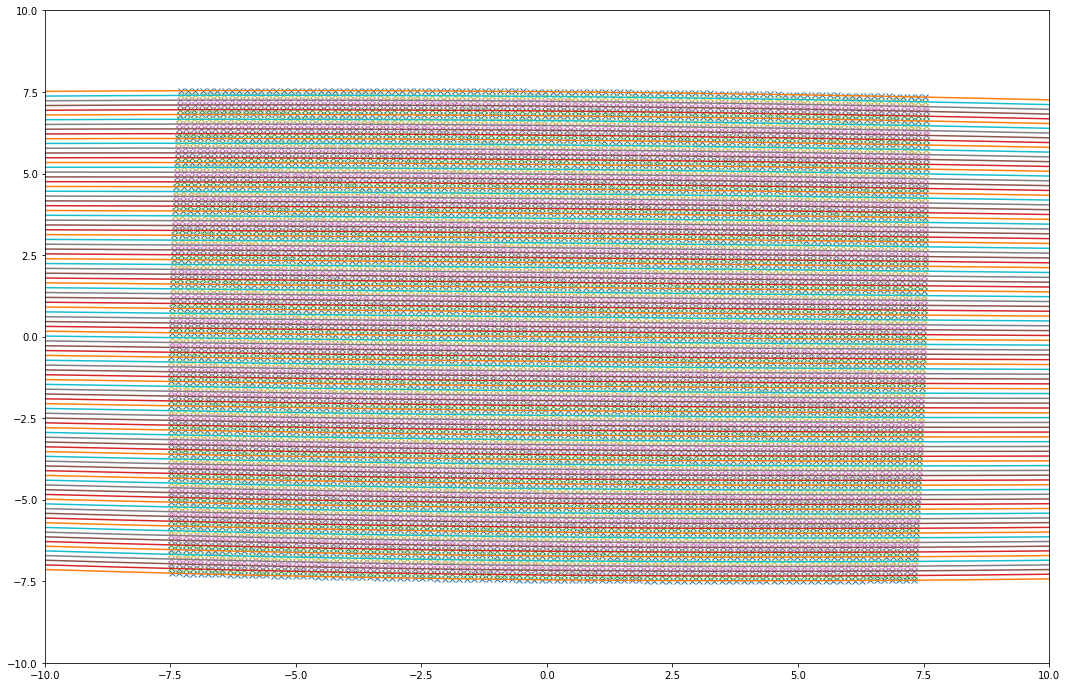

In [40]:
plt.clf()
fig=plt.figure(figsize=(18,12))
ax = fig.add_subplot(111)
n=0
A = np.zeros(len(LINES))
B = np.zeros(len(LINES))
C = np.zeros(len(LINES))
for line in LINES:
    x = line[1]; y = line[0]
    temp1 = np.array([[x[0]**2,x[1]**2,x[2]**2], [x[0],x[1],x[2]],[1,1,1]])
    temp2 = np.array([y[0], y[1],y[2]])
    p0 = np.linalg.solve(temp1,temp2)   ## estimating the guess array for each line
    popt, pcov = curve_fit(parabola_lines, x,y,p0)
     ## GOODNESS OF FIT
    chi_sq_w_lines = np.sum((parabola_lines(x,*popt)-y)**2)
    red_chi_sq_lines = chi_sq_w_lines/(len(x)-len(popt))
    #print chi_sq_w_lines, red_chi_sq_lines
    A[n] = popt[0]; B[n] = popt[1]; C[n] = popt[2]
    xnew = np.linspace(-10, 10, 1000)
    ynew = parabola_lines(xnew, *popt)
    ax.plot(x,y,'x')
    ax.plot(xnew, ynew,label=str(n))
    ax.set_xlim(-10,10)
    ax.set_ylim(-10,10)
    
    n=n+1

#plt.legend()
plt.show()

4.62137304695e-07 4.7156867826e-09
4.55824309934e-07 4.65126846871e-09
4.77446168743e-07 4.87189968105e-09
4.70624021335e-07 4.80228593199e-09
5.07694657599e-07 5.1805577306e-09
5.22416994817e-07 5.3307856614e-09
5.27502956746e-07 5.3826832321e-09
5.38504937164e-07 5.49494833841e-09
5.44210548132e-07 5.55316885849e-09
5.5279301314e-07 5.64074503204e-09
5.54239374976e-07 5.65550382629e-09
5.56785240169e-07 5.68148204254e-09
5.65150019399e-07 5.76683693264e-09
5.62407000786e-07 5.7388469468e-09
5.61578162254e-07 5.73038941076e-09
5.56177996417e-07 5.67528567773e-09
5.60961998169e-07 5.72410202213e-09
5.60076179677e-07 5.71506305792e-09
5.51288089861e-07 5.62538867205e-09
5.50242595489e-07 5.61472036213e-09
5.33164409837e-07 5.44045316161e-09
5.27250168058e-07 5.38010375569e-09
5.26644719027e-07 5.37392570436e-09
5.1764125624e-07 5.2820536351e-09
5.16891880817e-07 5.27440694711e-09
5.0156657816e-07 5.11802630776e-09
4.93041055465e-07 5.03103117822e-09
4.79466592305e-07 4.89251624801e-09
4

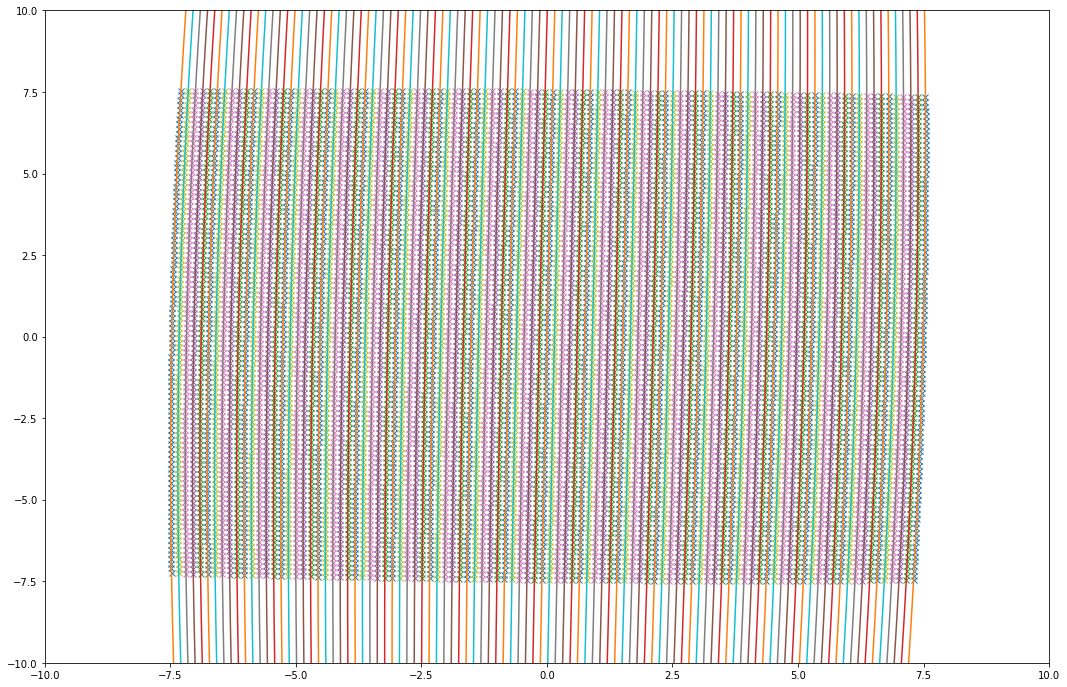

In [41]:
plt.clf()
fig=plt.figure(figsize=(18,12))
ax = fig.add_subplot(111)
n=0
M = np.zeros(len(COLUMNS))
N =  np.zeros(len(COLUMNS))
P =  np.zeros(len(COLUMNS))
for col in COLUMNS:
    x = col[1]; y = col[0]
    temp1 = np.array([[x[0]**2,x[1]**2,x[2]**2], [x[0],x[1],x[2]],[1,1,1]])
    temp2 = np.array([y[0], y[1],y[2]])
    p0 = np.linalg.solve(temp1,temp2)
    popt, pcov = curve_fit(parabola_columns, y,x,p0)
    chi_sq_w_cols = np.sum((parabola_columns(y,*popt)-x)**2)
    red_chi_sq_cols = chi_sq_w_cols/(len(x)-len(popt))
    print chi_sq_w_cols ,red_chi_sq_cols

    
    M[n]=popt[0]; N[n] = popt[1]; P[n] = popt[2]
    ynew = np.linspace(-10, 10, 10000)
    xnew = parabola_columns(ynew, *popt)
    ax.plot(x,y,'x')
    ax.plot(xnew, ynew,label=str(n))
    ax.set_xlim(-10,10)
    ax.set_ylim(-10,10)
    n=n+1

#plt.legend()
plt.show()

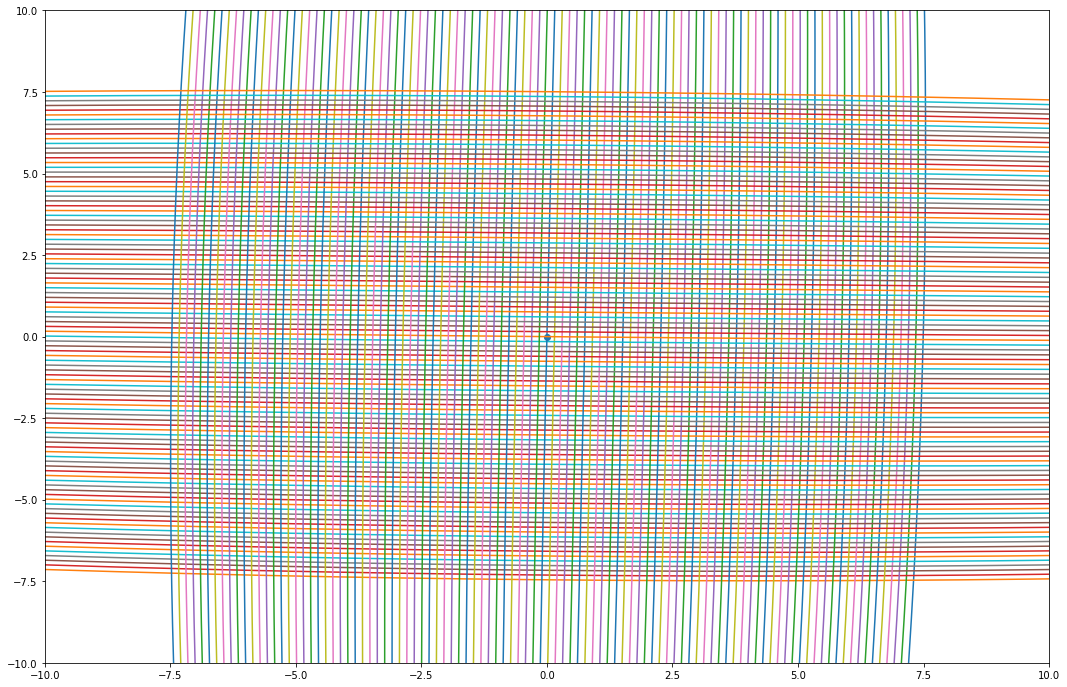

In [42]:
fig=plt.figure(figsize=(18,12))
ax = fig.add_subplot(111)
n=0
M = np.zeros(len(COLUMNS))
N =  np.zeros(len(COLUMNS))
P =  np.zeros(len(COLUMNS))
for col,line in zip(COLUMNS,LINES):
    x = col[1]; y = col[0]
    temp1 = np.array([[x[0]**2,x[1]**2,x[2]**2], [x[0],x[1],x[2]],[1,1,1]])
    temp2 = np.array([y[0], y[1],y[2]])
    p0 = np.linalg.solve(temp1,temp2)
    popt, pcov = curve_fit(parabola_columns, y,x,p0)
    
    
    M[n]=popt[0]; N[n] = popt[1]; P[n] = popt[2]
    ynew = np.linspace(-10, 10, 10000)
    xnew = parabola_columns(ynew, *popt)
    #ax.plot(x,y,'x')
    ax.plot(xnew, ynew,label=str(n))
    
    x = line[1]; y = line[0]
    temp1 = np.array([[x[0]**2,x[1]**2,x[2]**2], [x[0],x[1],x[2]],[1,1,1]])
    temp2 = np.array([y[0], y[1],y[2]])
    p0 = np.linalg.solve(temp1,temp2)   ## estimating the guess array for each line
    popt, pcov = curve_fit(parabola_lines, x,y,p0)
     ## GOODNESS OF FIT
    
    A[n] = popt[0]; B[n] = popt[1]; C[n] = popt[2]
    xnew2 = np.linspace(-10, 10, 1000)
    ynew2 = parabola_lines(xnew2, *popt)
    #ax.plot(x,y,'x')
    ax.plot(xnew2, ynew2,label=str(n))
    ax.set_xlim(-10,10)
    ax.set_ylim(-10,10)
    
    n=n+1
plt.scatter(0,0)
#plt.legend()
plt.show()

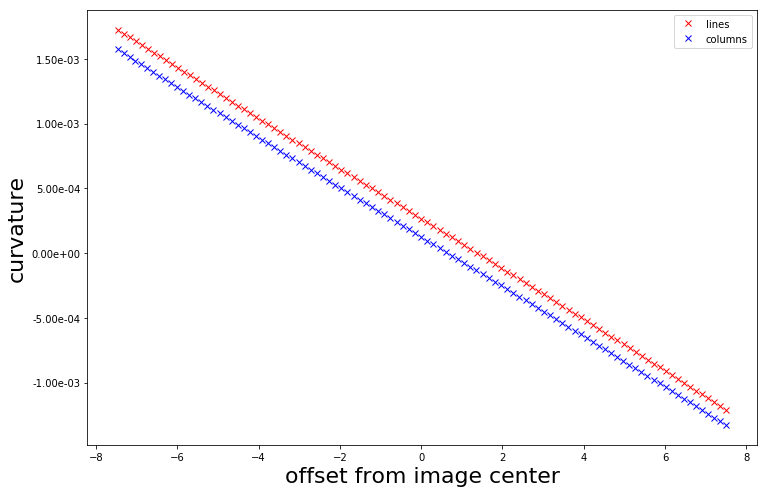

In [43]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.plot(C,A,'rx',label='lines')
ax.plot(P,M,'bx',label='columns')
ax.set_xlabel('offset from image center',fontsize=22)
ax.set_ylabel('curvature',fontsize=22)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
plt.legend(loc='best')
plt.show()


7.3768336273e-05 7.45134709829e-07
7.21378542827e-05 7.28665194775e-07


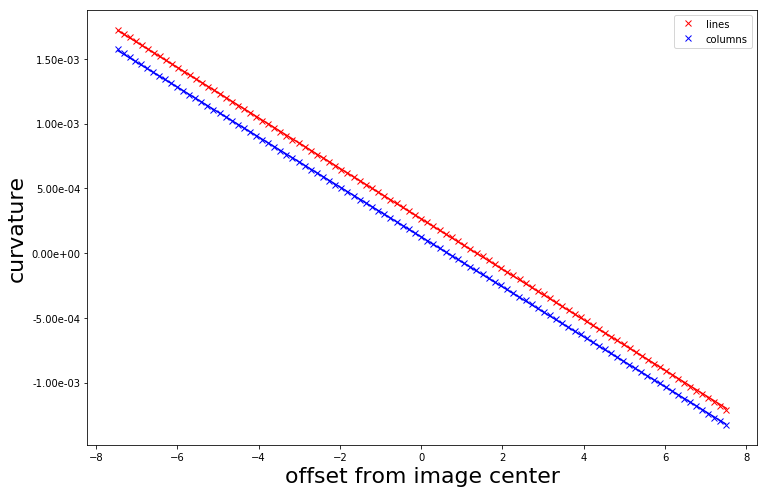

In [44]:
t = np.polyfit(C, A, 1)
tnew = np.linspace(C.min(),C.max(),100)
model = np.poly1d(t)
Tnew = model(tnew)
## GOODNESS OF FIT
chi_sq_w_lines = np.sum((model(A)-A)**2)
red_chi_sq_lines = chi_sq_w_lines/(len(A)-len(t))

print chi_sq_w_lines,red_chi_sq_lines
## columns
t2 = np.polyfit(P, M, 1)
tnew2 = np.linspace(P.min(),P.max(),100)
model2 = np.poly1d(t2)
Tnew2 = model2(tnew2)

## goodness of fit
chi_sq_w_cols = np.sum((model2(M)-M)**2)
red_chi_sq_cols = chi_sq_w_cols/(len(M)-len(t2))
print chi_sq_w_cols ,red_chi_sq_cols

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.plot(C,A,'rx',label='lines')
ax.plot(tnew,Tnew,'r')
ax.plot(P,M,'bx',label='columns')
ax.plot(tnew2, Tnew2, 'b')
ax.set_xlabel('offset from image center',fontsize=22)
ax.set_ylabel('curvature',fontsize=22)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
plt.legend(loc='best')
#plt.savefig('cvso_zemax.png',dpi=300)

In [45]:
Ny= Nx = 20
i,j = np.indices([Ny,Nx])
center = np.array([(i.max()-i.min())/2.0, (j.max()-j.min())/2.0])
xc = center[1]
yc = center[0]


del_lines = -t[1]/t[0]
del_columns = -t2[1]/t2[0]
#y_d = del_lines+yc
#x_d = del_columns + xc
#print 'the distortion center for python ROF is:', (x_d,y_d)
#print 'the center of the frame is:', (xc, yc)
print 'the shift from the numerical center is:', del_columns, 'mm', del_lines, 'mm'

the shift from the numerical center is: 0.649008505034 mm 1.35809635312 mm


#  refining

In [46]:


C_2 = A*xc**2 + B*xc + C #lines
P_2 = M*yc**2 + N*yc + P  #columns
trials = 10
i=0
temp_x = temp_y = np.zeros((10))


In [47]:
xd = 0
yd=0
for n in range(trials):
    
    t = np.polyfit(C_2, A, 1)
    t2 = np.polyfit(P_2, M, 1)
    
    del_lines = -t[1]/t[0]
    del_columns = -t2[1]/t2[0]
    yd = del_lines +yd
    xd = del_columns +xd
    print 'the distortion center is at:', (xd,yd)
    #print del_lines, del_columns
   
    C_2 = A*xd**2 + B*xd + C - yd#lines
    P_2 = M*yd**2 + N*yd + P - xd #columns
    temp_x[i] = xd
    temp_y[i] = yd
    i=i+1


the distortion center is at: (0.78574156963419484, 1.2274926856217236)
the distortion center is at: (0.6666757194287436, 1.3472941185815801)
the distortion center is at: (0.66840001337379595, 1.3489310139819699)
the distortion center is at: (0.6684235730995074, 1.3489073087045385)
the distortion center is at: (0.6684232319110387, 1.348906984809743)
the distortion center is at: (0.66842322724924308, 1.3489069895003394)
the distortion center is at: (0.66842322731675452, 1.3489069895644283)
the distortion center is at: (0.66842322731767589, 1.3489069895635002)
the distortion center is at: (0.66842322731766479, 1.3489069895634869)
the distortion center is at: (0.66842322731766302, 1.3489069895634884)


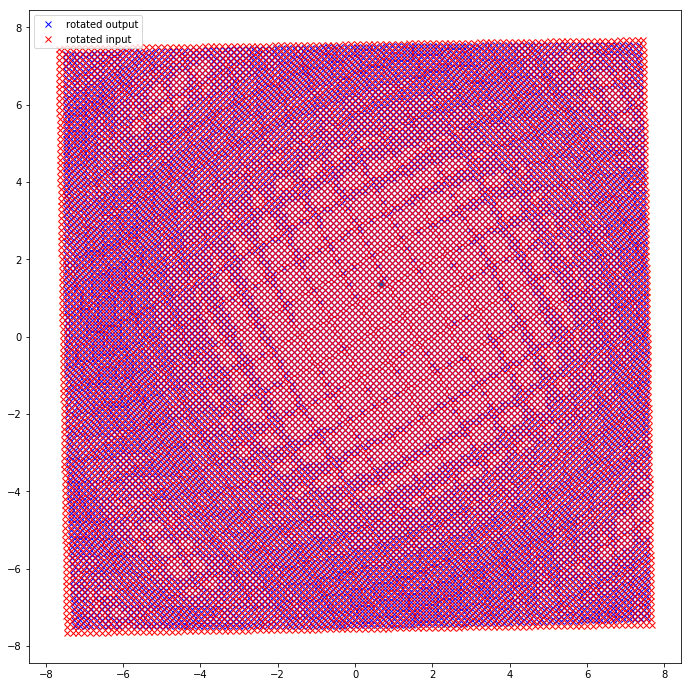

In [73]:
fig = plt.figure(figsize=(18,12))
ax= fig.add_subplot(111,aspect='equal')

#plt.plot(xinput,yinput,'rx',label='input')
#plt.plot(xoutput,youtput,'bx',label='output')
ax.plot(x_p,y_p,'bx',label='rotated output')
ax.plot(x_p_in, y_p_in,'rx',label='rotated input')

ax.scatter(xd,yd)
#plt.xlim(9,-9)
#plt.ylim(9,-9)
plt.legend()


In [49]:
C_3 = A*xd**2 + B*xd + C - yd
P_3 = M*yd**2 + N*yd + P - xd
B_3 = 2*A*xd + B
N_3 = 2*M*yd + N

0.000184216635333
0.000193510620353


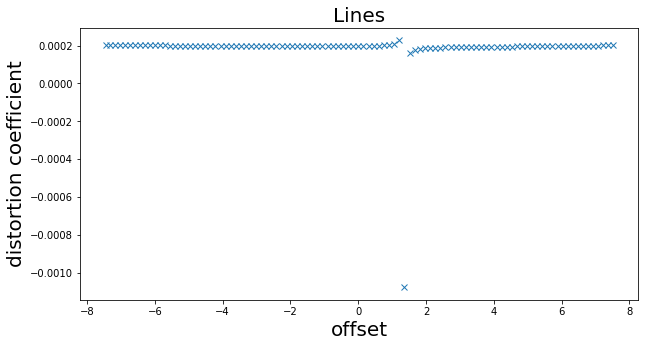

In [50]:
k_lines = (-A)/(C_3*(3*A*C_3 + 3*B_3**2 + 1))
plt.figure(figsize=(10,5))
plt.plot(C, k_lines,'x')
plt.ylabel('distortion coefficient',fontsize=20)
plt.xlabel('offset',fontsize=20)
plt.title('Lines',fontsize=20)
#print k_lines
print k_lines.mean()
print np.average(k_lines,weights=np.abs(C))

0.000194383532962
0.000195739571571


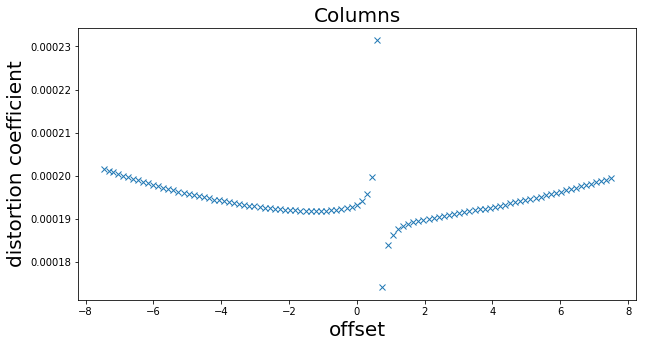

In [51]:
plt.figure(figsize=(10,5))
plt.ylabel('distortion coefficient',fontsize=20)
plt.xlabel('offset',fontsize=20)
plt.title('Columns',fontsize=20)
k_cols = (-M)/(P_3*(3*M*P_3+ 3*N_3**2 + 1))
#print k_cols
plt.plot(P,k_cols,'x')
print k_cols.mean()
print np.average(k_cols,weights=np.abs(P))

In [52]:
K = np.array([np.average(k_lines, weights=np.abs(C_3)), np.average(k_cols, weights=np.abs(P_3))])

print 'the distortion coefficient in pixels is:', K.mean()/10000  ## in pixels

the distortion coefficient in pixels is: 1.9720796894e-08


# Distortion in the rotated frame:

In [53]:
k = K.mean()
print k
print xd 
print yd
X_d = x_p; Y_d = y_p; x_d =  xd;
y_d =yd
X_u = X_d + (X_d - x_d )*(k*((X_d-x_d)**2 + (Y_d-y_d)**2))
Y_u = Y_d + (Y_d - y_d)*(k*((X_d-x_d)**2 + (Y_d-y_d)**2))


0.00019720796894
0.668423227318
1.34890698956


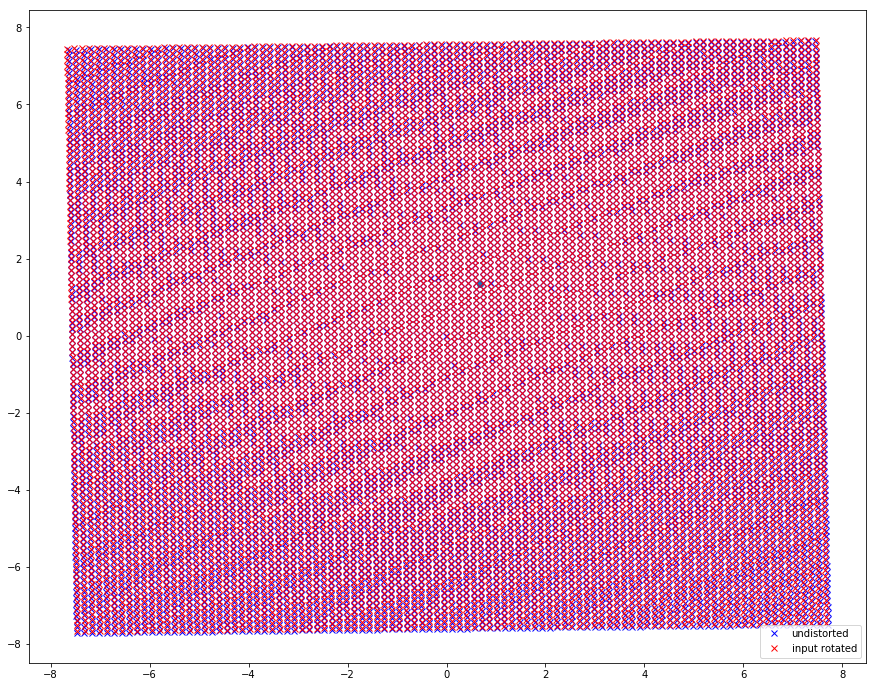

In [54]:
plt.clf()
fig = plt.figure(figsize=(15,12))
#plt.plot(xoutput,youtput,'rx',label='distorted')
#plt.plot(X_d, Y_d,'rx',label='output rotated')
plt.plot(X_u,Y_u,'bx',label='undistorted')
plt.plot(x_p_in, y_p_in,'rx', label='input rotated')
plt.scatter(xd,yd)
plt.legend()


In [55]:
## quality of the fit
print np.sum((x_p_in-X_u)**2)/np.sum(x_p_in**2)

## RMS error
d_m_pixels = 100*np.sqrt((1./len(X_u))*np.sum((X_u-X_d)**2+(Y_u-Y_d)**2))
print d_m_pixels

5.48474845585e-06
8.06043623475


# Distortion in the original frame of FDT
## The distortion was evaluated in the rotated frame, to shift back to the original frame of the FDT, I will use the initial coordinates, the same distortion coefficient, but the center of distortion has to be shifted.

In [74]:
theta = math.radians(45)

x_d_r = x_d* np.cos(theta) - y_d * np.sin(theta)
y_d_r = x_d* np.sin(theta) + y_d * np.cos(theta)
print x_d_r, y_d_r
print xd, yd

-0.481174682771 1.42646787625
0.668423227318 1.34890698956


In [75]:
k = K.mean()
print k
f = np.loadtxt(path+'Model_29')
i = f[:,0]; j = f[:,1]; xfield = f[:,2]; yfield = f[:,3]; R = f[:,4]; xinput = f[:,5]; yinput=f[:,6]; xoutput = f[:,7]; youtput = f[:,8]; distortion = f[:,9]
X_d = xoutput; Y_d = youtput
X_u = X_d + (X_d - x_d_r )*(k*((X_d-x_d_r)**2 + (Y_d-y_d_r)**2))
Y_u = Y_d + (Y_d - y_d_r)*(k*((X_d-x_d_r)**2 + (Y_d-y_d_r)**2))


0.00019720796894


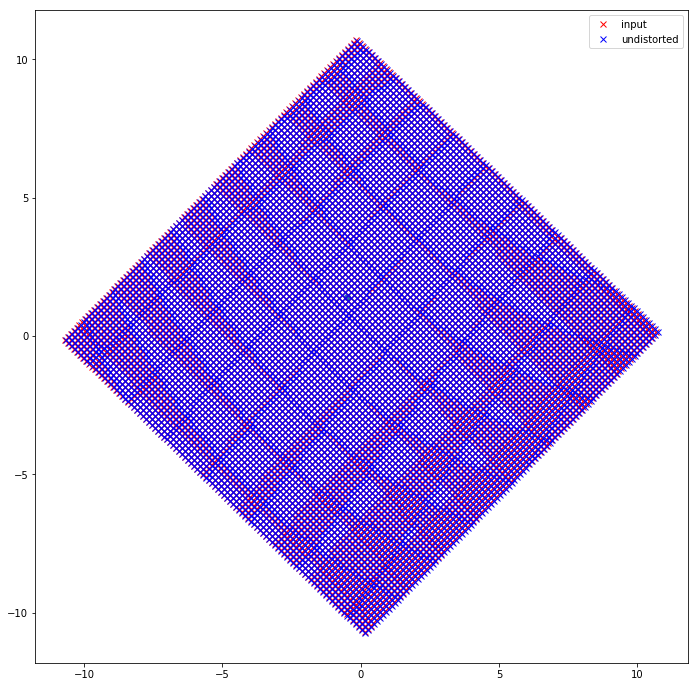

In [76]:
plt.clf()
fig = plt.figure(figsize=(15,12))
ax= fig.add_subplot(111,aspect='equal')

#plt.plot(xoutput,youtput,'rx',label='distorted')
ax.plot(xinput, yinput,'rx',label='input')
ax.plot(X_u,Y_u,'bx',label='undistorted')
ax.scatter(x_d_r,y_d_r)
plt.legend()


In [77]:
print np.sum((xinput-X_u)**2)/np.sum(xinput**2)


1.49585286613e-05


In [78]:
d_m_pixels = 100*np.sqrt((1./len(X_u))*np.sum((X_u-X_d)**2+(Y_u-Y_d)**2))
print d_m_pixels

8.06043623475


In [79]:
100*np.sqrt((1./len(xinput))*np.sum((xinput-xoutput)**2+(yinput-youtput)**2))

7.1820532029905602